<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-AngeHdz/blob/main/TecMty_kmeans_target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
###Prof María de la Paz Rico Fernández 

## **Adtividad de la Semana 7**
###**Kmeans Traget.**


Nombre de Alumno: Angel De Jesus Hernandez Pascual

N. matrícula: A01794256

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 29.8 MB/s 
     |████████████████████████████████| 1.0 MB 74.4 MB/s 
     |████████████████████████████████| 1.7 MB 57.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 91.5 MB/s 
     |████████████████████████████████| 6.3 MB 63.2 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=e5b115af9ce928b0647c3f5d985220684f55e62836fcae2545cab923977b880e
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=b5f42144b2ffce74d653fe59c5af103a7497f235f821bb0bd8178b700e18dbcd
  Stored in directory: /root/

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [ ]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [ ]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [ ]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

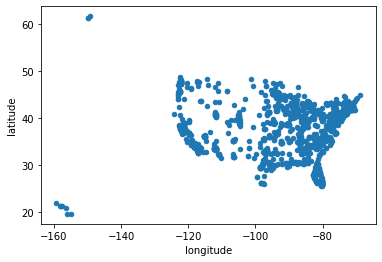

In [ ]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [ ]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [ ]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [ ]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [ ]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

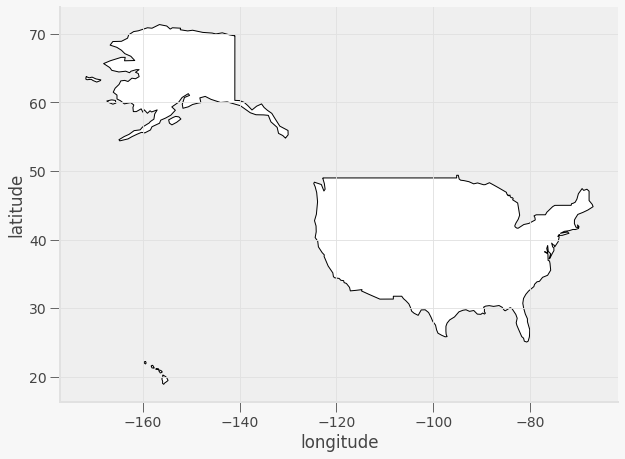

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

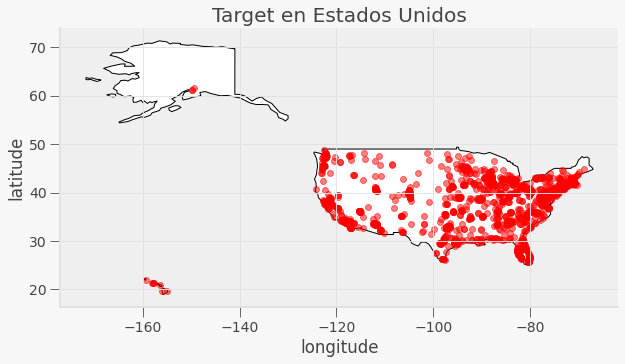

In [ ]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [ ]:
#tu codigo aquí

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
X=gdf.iloc[:,1:3]
X

,latitude,longitude
0,33.224225,-86.804174
1,33.334550,-86.989778
2,30.602875,-87.895932
3,34.560148,-86.971559
4,31.266061,-85.446422
...,...,...
1834,43.034293,-88.176840
1835,42.989604,-88.259806
1836,42.846799,-106.264166
1837,41.162019,-104.800048


In [ ]:
kmeans = KMeans(12)
kmeans.fit(X)

KMeans(n_clusters=12)

In [ ]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
data_with_clusters = gdf.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,latitude,longitude,address,phone,website,Coordinates,Cluster
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423),1
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455),1
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287),1
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015),1
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606),1
...,...,...,...,...,...,...,...,...
1834,Waukesha,43.034293,-88.176840,"2401 Kossow Rd, Waukesha, WI 53186-2904",262-784-8646,https://www.target.com/sl/waukesha/82,POINT (-88.17684 43.03429),4
1835,Waukesha South,42.989604,-88.259806,"1250 W Sunset Dr, Waukesha, WI 53189-8423",262-832-1272,https://www.target.com/sl/waukesha/2546,POINT (-88.25981 42.98960),4
1836,Casper,42.846799,-106.264166,"401 SE Wyoming Blvd, Casper, WY 82609-4219",307-265-8214,https://www.target.com/sl/casper/164,POINT (-106.26417 42.84680),0
1837,Cheyenne,41.162019,-104.800048,"1708 Dell Range Blvd, Cheyenne, WY 82009-4945",307-637-8888,https://www.target.com/sl/cheyenne/224,POINT (-104.80005 41.16202),0


In [ ]:
data_with_clusters = gdf.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,name,latitude,longitude,address,phone,website,Coordinates,Cluster
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423),1
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455),1
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287),1
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015),1
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606),1
...,...,...,...,...,...,...,...,...
1834,Waukesha,43.034293,-88.176840,"2401 Kossow Rd, Waukesha, WI 53186-2904",262-784-8646,https://www.target.com/sl/waukesha/82,POINT (-88.17684 43.03429),4
1835,Waukesha South,42.989604,-88.259806,"1250 W Sunset Dr, Waukesha, WI 53189-8423",262-832-1272,https://www.target.com/sl/waukesha/2546,POINT (-88.25981 42.98960),4
1836,Casper,42.846799,-106.264166,"401 SE Wyoming Blvd, Casper, WY 82609-4219",307-265-8214,https://www.target.com/sl/casper/164,POINT (-106.26417 42.84680),0
1837,Cheyenne,41.162019,-104.800048,"1708 Dell Range Blvd, Cheyenne, WY 82009-4945",307-637-8888,https://www.target.com/sl/cheyenne/224,POINT (-104.80005 41.16202),0


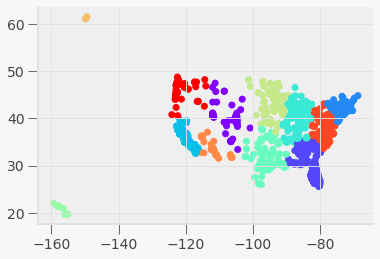

In [ ]:
plt.scatter(gdf['longitude'], gdf['latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
#plt.xlim(-180,180)
#plt.ylim(-90, 90)
plt.show()


In [ ]:
centroids = kmeans.cluster_centers_
print(centroids)

[[  39.96372699 -106.8753301 ]
 [  30.29961525  -82.83638406]
 [  41.3122448   -73.65439441]
 [  35.38521699 -119.26760578]
 [  40.76495202  -86.69865338]
 [  31.80793043  -96.1699054 ]
 [  20.94542771 -157.31225085]
 [  43.18760768  -93.95262114]
 [  61.31264473 -149.6767927 ]
 [  33.89227422 -112.30398903]
 [  38.50398159  -78.74595717]
 [  46.23248361 -121.4192267 ]]


In [ ]:
centers = pd.DataFrame(centroids, columns= [ 'latitude','longitude'] )
centers

,latitude,longitude
0,39.963727,-106.875330
1,30.299615,-82.836384
2,41.312245,-73.654394
3,35.385217,-119.267606
4,40.764952,-86.698653
5,31.807930,-96.169905
6,20.945428,-157.312251
7,43.187608,-93.952621
8,61.312645,-149.676793
9,33.892274,-112.303989


In [ ]:
centers["Coordinates"] = list(zip(centers.longitude, centers.latitude))
centers["Coordinates"] = centers["Coordinates"].apply(Point)
centers.head()

,latitude,longitude,Coordinates
0,39.963727,-106.875330,POINT (-106.87533009875 39.96372698875)
1,30.299615,-82.836384,POINT (-82.83638405863636 30.299615250909092)
2,41.312245,-73.654394,POINT (-73.654394415 41.31224479857143)
3,35.385217,-119.267606,POINT (-119.2676057835 35.385216992)
4,40.764952,-86.698653,POINT (-86.69865337777777 40.76495202095238)


In [ ]:
centersgdf = gpd.GeoDataFrame(centers, geometry="Coordinates")
centersgdf.head(20)

,latitude,longitude,Coordinates
0,39.963727,-106.875330,POINT (-106.87533 39.96373)
1,30.299615,-82.836384,POINT (-82.83638 30.29962)
2,41.312245,-73.654394,POINT (-73.65439 41.31224)
3,35.385217,-119.267606,POINT (-119.26761 35.38522)
4,40.764952,-86.698653,POINT (-86.69865 40.76495)
5,31.807930,-96.169905,POINT (-96.16991 31.80793)
6,20.945428,-157.312251,POINT (-157.31225 20.94543)
7,43.187608,-93.952621,POINT (-93.95262 43.18761)
8,61.312645,-149.676793,POINT (-149.67679 61.31264)
9,33.892274,-112.303989,POINT (-112.30399 33.89227)


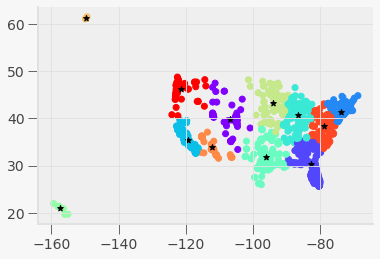

In [ ]:
from matplotlib.cm import cmaps_listed
plt.scatter(df['longitude'], df['latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c=['black'])
#plt.xlim(-180,180)
#plt.ylim(-90, 90)
plt.show()


In [ ]:
data_with_clusters

,name,latitude,longitude,address,phone,website,Coordinates,Cluster
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423),1
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455),1
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287),1
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015),1
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606),1
...,...,...,...,...,...,...,...,...
1834,Waukesha,43.034293,-88.176840,"2401 Kossow Rd, Waukesha, WI 53186-2904",262-784-8646,https://www.target.com/sl/waukesha/82,POINT (-88.17684 43.03429),4
1835,Waukesha South,42.989604,-88.259806,"1250 W Sunset Dr, Waukesha, WI 53189-8423",262-832-1272,https://www.target.com/sl/waukesha/2546,POINT (-88.25981 42.98960),4
1836,Casper,42.846799,-106.264166,"401 SE Wyoming Blvd, Casper, WY 82609-4219",307-265-8214,https://www.target.com/sl/casper/164,POINT (-106.26417 42.84680),0
1837,Cheyenne,41.162019,-104.800048,"1708 Dell Range Blvd, Cheyenne, WY 82009-4945",307-637-8888,https://www.target.com/sl/cheyenne/224,POINT (-104.80005 41.16202),0


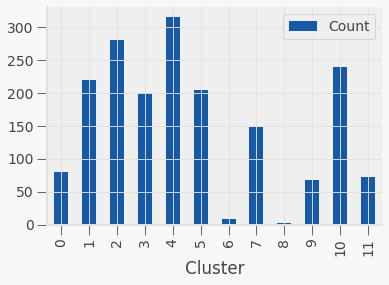

In [ ]:
df2 = data_with_clusters.groupby(['Cluster'])['Cluster'].count().to_frame()
df2.columns.values[0] = "Count"
df2.plot(kind='bar')

In [ ]:
df2

,Count
Cluster,
0,80
1,220
2,280
3,200
4,315
5,204
6,8
7,149
8,3


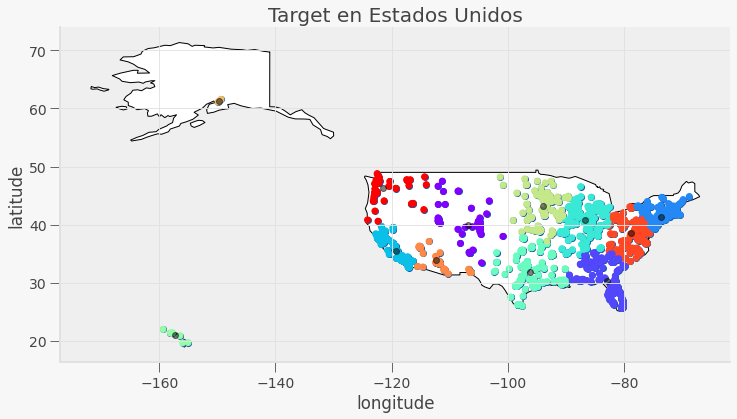

In [ ]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(12,14))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax,).scatter(gdf['longitude'], gdf['latitude'], c=data_with_clusters['Cluster'], cmap = 'rainbow')
centersgdf.plot(ax=gax, color='black', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
centers

,latitude,longitude,Coordinates
0,39.963727,-106.875330,POINT (-106.87533 39.96373)
1,30.299615,-82.836384,POINT (-82.83638 30.29962)
2,41.312245,-73.654394,POINT (-73.65439 41.31224)
3,35.385217,-119.267606,POINT (-119.26761 35.38522)
4,40.764952,-86.698653,POINT (-86.69865 40.76495)
5,31.807930,-96.169905,POINT (-96.16991 31.80793)
6,20.945428,-157.312251,POINT (-157.31225 20.94543)
7,43.187608,-93.952621,POINT (-93.95262 43.18761)
8,61.312645,-149.676793,POINT (-149.67679 61.31264)
9,33.892274,-112.303989,POINT (-112.30399 33.89227)


In [ ]:
def Get_City(latitude,longitude):
  return geolocator.reverse(latitude+","+longitude)

In [ ]:
location = geolocator.reverse("39.96372698875"+","+"-106.87533009875")
City = []
for ind in centersgdf.index:
  latitude = centersgdf['latitude'][ind]
  longitude = centersgdf['longitude'][ind]
  print(latitude, longitude)
  City.append(Get_City(str(centersgdf['latitude'][ind]), str(centersgdf['longitude'][ind])))
centersgdf["City"] = City


39.96372698875 -106.87533009875
30.299615250909092 -82.83638405863636
41.31224479857143 -73.654394415
35.385216992 -119.2676057835
40.76495202095238 -86.69865337777777
31.8079304254902 -96.16990539656862
20.945427712500003 -157.31225085
43.18760767785235 -93.9526211409396
61.31264473333333 -149.6767927
33.89227422205882 -112.30398902941175
38.50398158583333 -78.74595716916666
46.2324836125 -121.41922669722223


Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?

In [ ]:
centersgdf

,latitude,longitude,Coordinates,City
0,39.963727,-106.875330,POINT (-106.87533 39.96373),"(Routt County, Colorado, United States, (40.45..."
1,30.299615,-82.836384,POINT (-82.83638 30.29962),"(82nd Terrace, Suwannee County, Florida, 32060..."
2,41.312245,-73.654394,POINT (-73.65439 41.31224),"(5, Cider Mill Lane, Town of North Salem, West..."
3,35.385217,-119.267606,POINT (-119.26761 35.38522),"(Sidding Road, Calders Corner, Kern County, Ca..."
4,40.764952,-86.698653,POINT (-86.69865 40.76495),"(North 900 East, White County, Indiana, 47960,..."
5,31.807930,-96.169905,POINT (-96.16991 31.80793),"(Freestone County, Texas, United States, (31.8..."
6,20.945428,-157.312251,POINT (-157.31225 20.94543),"(United States, (39.7837304, -100.445882))"
7,43.187608,-93.952621,POINT (-93.95262 43.18761),"(Birch Avenue, Hancock County, Iowa, 50484, Un..."
8,61.312645,-149.676793,POINT (-149.67679 61.31264),"(Anchorage, Alaska, United States, (61.1758781..."
9,33.892274,-112.303989,POINT (-112.30399 33.89227),"(Yavapai Point Trail, Peoria, Yavapai County, ..."


In [ ]:
centersgdf["City"]

0     (Routt County, Colorado, United States, (40.45...
1     (82nd Terrace, Suwannee County, Florida, 32060...
2     (5, Cider Mill Lane, Town of North Salem, West...
3     (Sidding Road, Calders Corner, Kern County, Ca...
4     (North 900 East, White County, Indiana, 47960,...
5     (Freestone County, Texas, United States, (31.8...
6            (United States, (39.7837304, -100.445882))
7     (Birch Avenue, Hancock County, Iowa, 50484, Un...
8     (Anchorage, Alaska, United States, (61.1758781...
9     (Yavapai Point Trail, Peoria, Yavapai County, ...
10    (3092, Fridleys Gap Road, Rockingham County, V...
11    (Yakima County, Washington, United States, (46...
Name: City, dtype: object

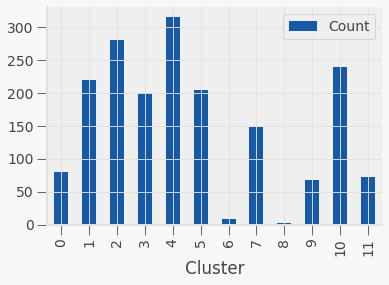

In [ ]:
df2 = data_with_clusters.groupby(['Cluster'])['Cluster'].count().to_frame()
df2.columns.values[0] = "Count"
df2.plot(kind='bar')

Concluciones

En este caso yo decidi generar 12 centros de distribucion, para tener la cobertura principalmente de Hawai y Alaska, aunque tienen menos tiendas, estan demaciado lejos.
AL utiilizar 12 centros de distribucion, uno de ellos tiene mas de 300 y los de Alaska solo 1, en mi caso concidero debe existir, por la gran distacia que se necesita para trasladar los productos.

#Librarias para mostrar geolocalizacion

#geopy

Libreria para uso de geolocalizacion, ciudades y direcciones
https://github.com/geopy/geopy

#Fiona

Alternativa a Geopandas
https://pypi.org/project/Fiona/

#Plotly

Alternativa de graficacion incluyendo mapas
https://plotly.com/python/mapbox-county-choropleth/